In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [33]:
X,y  = make_blobs(n_samples=500, n_features= 2, centers= 3, random_state= 40)

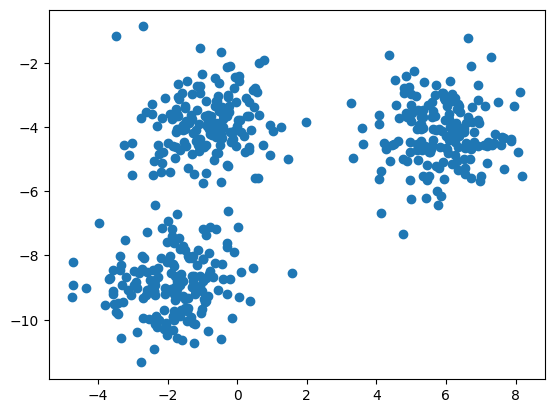

In [34]:
fig = plt.figure(0);

plt.scatter(X[:,0], X[:,1])
""" X[:,0] -> all the values in the 0th column (X axis)
    X[:,1] -> all the values in the 1th column (Y axis)"""

plt.show()

In [35]:
k = 3

clusters = {} #empty dictionary
""" X.shape[1] gives you the number of features, here 2
    """

for idx in range(k):
    center = 2 *(2*np.random.random((X.shape[1],))-1) 
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
    clusters[idx] = cluster
clusters

{0: {'center': array([1.056318  , 0.76830647]), 'points': []},
 1: {'center': array([ 1.74759863, -0.67909596]), 'points': []},
 2: {'center': array([-1.26212065, -0.51651196]), 'points': []}}

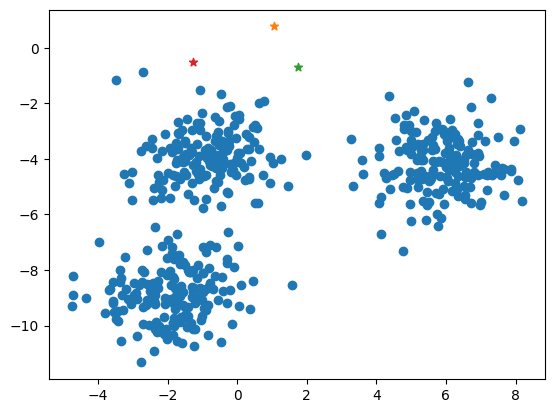

In [36]:
plt.scatter(X[:,0], X[:,1])
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker = '*')

plt.show()

In [37]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))


In [38]:
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]): #for all datapoitns
        dist = []
        curr_x = X[idx]

        for i in range(k):
            dis = distance(curr_x, clusters[i]['center'])
            dist.append(dis)
        
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if(points.shape[0] > 0):
            new_center = points.mean(axis = 0)
            clusters[i]['center'] = new_center
            clusters[i]['points'] = []

    return clusters

In [39]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i], clusters[j]['center']))

        pred.append(np.argmin(dist))
    return pred


In [40]:
clusters = assign_clusters(X, clusters)
clusters = update_clusters(X, clusters)
pred = pred_cluster(X,clusters)

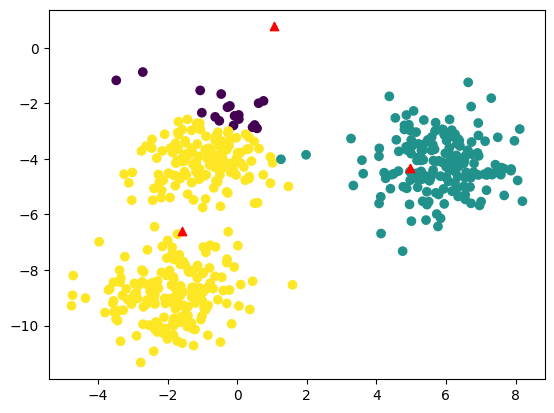

In [41]:
plt.scatter(X[:,0], X[:,1], c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker = "^", c = 'red')
plt.show()

## Using SciKitLearn model

In [44]:
from sklearn.cluster import KMeans

k = 10
kmeans = KMeans(init = "random", n_clusters = 3, n_init = 10, random_state = 0)

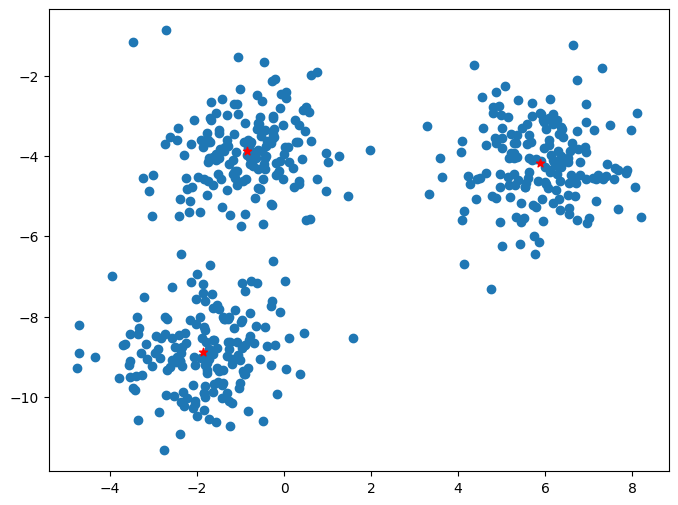

In [45]:
kmeans.fit(X)

y_kmeans = kmeans.predict(X)

plt.figure(figsize = (8,6))


plt.scatter(X[:,0], X[:,1])

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = 'red', marker = '*')